## Calcualte structural and sequnence identity of the sequneces to create CataloDB

In order to create the benchmark with the proper comparisons we seek to ensure that we have a proper training and test split where homologous sequences are completely held out of the training set. This means removing sequences with either structural or sequence similarity. Given there are very few sequneces with experimentally validated active sites this leaves few sequences.

Steps:
1. Remove those with sequence similarity < 30% using mmseqs (this is the file `Low30_mmseq_ID_exp_subset`)
2. Check these are indeed low sequnece homology to the training set (use Diamond blast)
3. Check for the structural similarity to the PDB intersection with the train set, remove any that have sturctural identity > 50%.


In [1]:
import pandas as pd
from Bio import SeqIO
from sciutil import SciUtil
import os

u = SciUtil()

# Note you also need a directory called 'blast' in data.

data_dir = 'data'
benchmark_data = 'data/benchmark_setup'
fig_dir = 'figures/'
pdb_dir = 'data/pdb'

test_set = set(list(pd.read_csv(os.path.join(benchmark_data, 'Low30_mmseq_ID_exp_subset.txt'), sep='\t', header=None)[0].values))
train_seqs = []
test_seqs = []
for seq_record in SeqIO.parse(os.path.join(benchmark_data, "All_seqs_at_90_id.fasta"), "fasta"):
    seq_id = seq_record.id.split('|')[1]
    if seq_id in test_set:
        test_seqs.append([seq_id, str(seq_record.seq)])
    else:
        train_seqs.append([seq_id, str(seq_record.seq)])

# Read in the ones 
test_seqs = pd.DataFrame(test_seqs, columns=['Entry', 'Sequence'])
train_seqs = pd.DataFrame(train_seqs, columns=['Entry', 'Sequence'])

u.dp(['Sequence similarity test set: ', len(test_seqs), '\n Number of remaining training data:', len(train_seqs)])

--------------------------------------------------------------------------------
 Sequence similarity test set: 	252	
 Number of remaining training data:	5355	  
--------------------------------------------------------------------------------


# Do BLAST to confirm the seq identity between the low sequence homology sets

Here as a second validation we run diamond blast using `enzyme-tk` to check for low sequence homology to the training set.


In [8]:
# Remove from SwissProt
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/')
from enzymetk.sequence_search_blast import BLAST
from enzymetk.save_step import Save

# Now we're going to save this as a fasta file 
fasta_label = os.path.join(data_dir, 'Low30_mmseq_ID_exp_subset_train.fasta')

with open(fasta_label, 'w+') as fout:
    for entry, seq in train_seqs[['Entry', 'Sequence']].values:
        if entry not in test_set:
            fout.write(f'>{entry}\n{seq}\n')
        else:
            # Just making double sure no contamination
            print(f"{entry} in training set?")
            
# Do blast on this dataset
id_col = 'Entry'
seq_col = 'Sequence'
test_seqs << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(os.path.join(data_dir, 'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl')))

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: data/Low30_mmseq_ID_exp_subset_train.fasta
Opening the database file...  [0.003s]
Loading sequences...  [0.021s]
Masking sequences...  [0.234s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.007s]

Database sequences  5355
  Database letters  2195041
     Database hash  af5530a8efa5117c2130e2159a2377a9
        Total time  0.271000s


['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmprsepzbss/ItDAEz8p1c_db', '-q', '/tmp/tmprsepzbss/ItDAEz8p1c_query.fasta', '-o', '/tmp/tmprsepzbss/ItDAEz8p1c_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmprsepzbss/ItDAEz8p1c_db -q /tmp/tmprsepzbss/ItDAEz8p1c_query.fasta -o /tmp/tmprsepzbss/ItDAEz8p1c_matches.tsv	
--------------------------------------------------------------------------------


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmprsepzbss
#Target sequences to report alignments for: 25
Opening the database...  [0.009s]
Database: /tmp/tmprsepzbss/ItDAEz8p1c_db (type: Diamond database, sequences: 5355, letters: 2195041)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Loading query sequences...  [0.008s]
Masking queries...  [0.247s]
Algorithm: Double-indexed
Building query histograms...  [0.563s]
Seeking in database...  [0s]
Loading reference sequences...  [0.006s]
Masking reference...  [0.351s]
Initializing temporary storage...  [0.002s]
Building reference histograms...  [3.605s]
Alloc

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmprsepzbss
#Target sequences to report alignments for: 25
Opening the database...  [0.009s]
Database: /tmp/tmprsepzbss/ItDAEz8p1c_db (type: Diamond database, sequences: 5355, letters: 2195041)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

,query,target,sequence identity,length,mismatch,gapopen,query start,query end,target start,target end,e-value,bitscore
0,A5JTM5,A4YI89,28.9,228,149,2,2,225,3,221,7.370000e-27,102.0
1,A5JTM5,Q5SKU3,34.3,207,129,6,8,211,3,205,1.340000e-23,94.0
2,A5JTM5,P52046,27.7,224,156,2,10,232,11,229,3.010000e-23,93.2
3,A5JTM5,Q5LLW6,29.8,215,135,5,10,213,18,227,8.640000e-21,86.7
4,A5JTM5,O53561,30.6,196,120,4,16,204,21,207,2.850000e-18,79.7
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Q56694,P94358,19.6,424,297,13,1,413,27,417,1.460000e-06,48.1
452,Q56694,Q56R04,24.9,257,146,9,25,263,43,270,1.970000e-06,47.8
453,Q56694,P56533,30.6,160,100,5,137,296,156,304,2.590000e-06,47.4
454,Q56694,Q92UV7,25.2,246,165,7,48,290,63,292,7.740000e-06,45.8


# Read in the output and confirm that the sequnece homology is low to any of the test set

/tmp/ipykernel_1813771/3442287431.py:71: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(vis_df, x=self.x, bins=self.bins, hue=self.hue, color=self.colour, palette=self.palette)


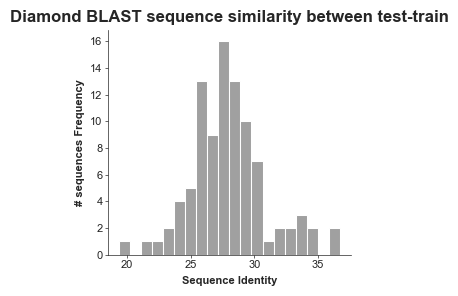

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sciviso import Histogram

blast_df = pd.read_pickle(os.path.join(data_dir, 'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl'))
blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
blast_df.drop_duplicates('query', inplace=True)

config = {'figsize': (3, 3), 'colour': 'grey'}

hist = Histogram(blast_df, x='sequence identity', ylabel='# sequences', xlabel='Sequence Identity',
                 title='Diamond BLAST sequence similarity between test-train', config=config)
hist.plot()
plt.savefig(os.path.join(fig_dir, 'CataloDB_diamondBLAST_test-train_seqsim.svg'))

# Save these to files to use later

First just save each DF then we'll download the PDBs using the API.

In [18]:
test_seqs.to_csv(os.path.join(data_dir, 'Low30_mmseq_ID_exp_subset_test.csv'), index=False)
train_seqs.to_csv(os.path.join(data_dir, 'Low30_mmseq_ID_exp_subset_train.csv'), index=False)

# Look at structure similarity as well

Get the download script from PDB: https://www.rcsb.org/docs/programmatic-access/batch-downloads-with-shell-script
e.g. `wget https://www.rcsb.org/scripts/batch_download.sh` in the `data/pdb` folder. 


In [2]:
# Get the pdbs ids for the test dataset
pdbs = pd.read_csv(os.path.join(pdb_dir, 'pdb_ids.txt'), sep='\t')

# We'll just download one of them but we keep track of all to remove from the search
pdbs = pdbs.dropna()
pdbs['pdb_download'] = [p.split(';')[0].lower() for p in pdbs['PDB'].values]
# Just download the ones in the test_df
pdbs_download = pdbs[pdbs['Entry'].isin(set(test_seqs['Entry'].values))]
# Save these to a text file
with open(os.path.join(pdb_dir, 'files.txt'), 'w+') as fout:
    fout.write(', '.join(set(pdbs_download['pdb_download'].values)))
    fout.write('\n')

# Run the following on the terminal when you are located within the pdb folder
# Download ./batch_download.sh -f  files.txt -p


# Unzip each of the files and store the path to this

In [3]:
pdbs_download['pdb_path'] = [os.path.join(pdb_dir, f'{p}.pdb') for p in pdbs_download['pdb_download'].values]
# Unzip each of the pdbs

# for pdb in pdbs_download['pdb_download'].values[2:]:
#     os.system(f'gzip -d {os.path.join(pdb_dir, pdb)}.pdb.gz')

# Save to CSV for later use
pdbs_download.to_csv(os.path.join(data_dir, 'pdbs_download.csv'), index=False)

/tmp/ipykernel_261381/1620105135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdbs_download['pdb_path'] = [os.path.join(pdb_dir, f'{p}.pdb') for p in pdbs_download['pdb_download'].values]


# Run foldseek using Enzyme-tk on the test set against all of PDB 

In [5]:
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/')
from enzymetk.similarity_foldseek_step import FoldSeek
from enzymetk.save_step import Save
import pandas as pd

pdbs_download = pd.read_csv(os.path.join(data_dir, 'pdbs_download.csv'))

# foldseek_dir: str, pdb_column_name: str, reference_database: str
pdb_column_name = 'pdb_path'
id_column_name = 'pdb_download'
# The foldseek database was created using the folldwing command in this location:
# foldseek databases PDB pdb tmp 
reference_database = '/disk1/share/software/foldseek/structures/pdb/pdb'
pdbs_download << (FoldSeek(id_column_name, pdb_column_name, reference_database, args=['--cov-mode', '2']) >> Save(os.path.join(data_dir, 'pdb_files.pkl')))           

--------------------------------------------------------------------------------
Running command	foldseek easy-search data/pdb/7dbi.pdb data/pdb/6ka2.pdb data/pdb/5af2.pdb data/pdb/1jxz.pdb data/pdb/3rbv.pdb data/pdb/6nes.pdb data/pdb/7zu8.pdb data/pdb/7s3l.pdb data/pdb/3oa8.pdb data/pdb/5udq.pdb data/pdb/1zy9.pdb data/pdb/5n4b.pdb data/pdb/4au9.pdb data/pdb/5b08.pdb data/pdb/5wgr.pdb data/pdb/6pvf.pdb data/pdb/3geb.pdb data/pdb/1fc6.pdb data/pdb/1fsi.pdb data/pdb/2p8g.pdb data/pdb/1d8h.pdb data/pdb/3edy.pdb data/pdb/1fez.pdb data/pdb/1nc5.pdb data/pdb/1j58.pdb data/pdb/1i24.pdb data/pdb/1iq8.pdb data/pdb/2deo.pdb data/pdb/2xci.pdb data/pdb/2i5t.pdb data/pdb/2ypt.pdb data/pdb/3ujz.pdb data/pdb/4cyf.pdb data/pdb/1aro.pdb data/pdb/1ddt.pdb data/pdb/1ckq.pdb data/pdb/1dp0.pdb data/pdb/1b12.pdb data/pdb/1hq6.pdb data/pdb/2c5u.pdb data/pdb/1j53.pdb data/pdb/3uj3.pdb data/pdb/1avp.pdb data/pdb/1am7.pdb data/pdb/1ogs.pdb data/pdb/1az0.pdb data/pdb/1diz.pdb data/pdb/1eni.pdb data/pdb/1cpo.pdb 

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits
0,6ea6_D,6ea8-assembly2.cif.gz_B,1.000,192,0,0,2,193,4,195,4.189000e-37,1656
1,6ea6_D,8c9k-assembly2.cif.gz_D-2,0.937,192,12,0,2,193,3,194,4.664000e-37,1655
2,6ea6_D,6ea8-assembly5.cif.gz_I-4,0.921,192,14,0,2,193,3,181,1.069000e-32,1411
3,6ea6_D,6ea8-assembly4.cif.gz_J,0.921,192,14,0,2,193,3,180,9.152000e-32,1377
4,6ea6_D,6xb3-assembly7.cif.gz_N,0.221,178,135,0,13,186,44,221,7.126000e-11,379
...,...,...,...,...,...,...,...,...,...,...,...,...
355257,4px7,7sqc-assembly1.cif.gz_1W,0.166,244,178,0,2,245,52,265,7.252000e+00,17
355258,4px7,7ocy-assembly1.cif.gz_A,0.099,225,155,0,8,232,142,314,7.623000e+00,17
355259,4px7,6h2e-assembly1.cif.gz_Q-2,0.102,224,151,0,2,225,48,216,9.785000e+00,16
355260,4px7,6yof-assembly1.cif.gz_A,0.140,216,182,0,12,227,246,458,6.563000e+00,13


# Read in foldseek results and limit the search to just the training dataset

In [6]:
results = pd.read_pickle(os.path.join(data_dir, 'pdb_files.pkl'))

u.dp(['Number of results from FoldSeek: ', len(results)])

# Now we need to drop any targets that were within the test set (i.e. this doesn't matter since we aren't using for training)
# And only keep targets that were in the train set
pdbs_to_omit = []
pdbs_to_keep = []
test_ids = set(test_seqs['Entry'].values)
train_ids = set(train_seqs['Entry'].values)

for entry, p in pdbs[['Entry', 'PDB']].values:
    for pdb in p.split(';'):
        if entry in test_ids: 
            pdbs_to_omit.append(pdb.lower())
        if entry in train_ids:
            pdbs_to_keep.append(pdb.lower())
        if entry in train_ids and entry in test_ids:
            # Print any issues or overlap between train and test... just incase!
            print(entry)
len(pdbs_to_omit)

--------------------------------------------------------------------------------
                   Number of results from FoldSeek: 	355262	                    
--------------------------------------------------------------------------------


1943

In [7]:
# Great now remove these from results
results['pdb_target'] = [c.split('-')[0] for c in results['target'].values]
results['pdb_query'] = [c.split('-')[0].split('_')[0] for c in results['query'].values]

results = results[~results['pdb_target'].isin(set(pdbs_to_omit))]
results = results[results['pdb_query'].isin(set(pdbs_to_omit))]
results = results[results['pdb_target'].isin(set(pdbs_to_keep))]
results # 63822

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,pdb_target,pdb_query
4,6ea6_D,6xb3-assembly7.cif.gz_N,0.221,178,135,0,13,186,44,221,7.126000e-11,379,6xb3,6ea6
5,6ea6_D,6xb3-assembly6.cif.gz_K,0.229,181,134,0,12,186,40,220,6.066000e-11,375,6xb3,6ea6
7,6ea6_D,6xb3-assembly3.cif.gz_F,0.221,174,135,0,13,186,44,217,8.833000e-11,366,6xb3,6ea6
8,6ea6_D,6xb3-assembly1.cif.gz_A,0.225,187,134,0,13,186,44,230,1.511000e-10,355,6xb3,6ea6
9,6ea6_D,6xb3-assembly5.cif.gz_I,0.214,184,136,0,13,186,43,226,1.155000e-10,351,6xb3,6ea6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355145,3en0_C,1r7a-assembly1.cif.gz_A,0.053,320,224,0,21,258,174,493,9.822000e+00,12,1r7a,3en0
355168,4f88_A,3bq1-assembly1.cif.gz_A,0.123,63,50,0,9,66,25,87,6.359000e+00,23,3bq1,4f88
355171,4f88_A,7nuu-assembly1.cif.gz_A,0.120,47,38,0,9,52,1,47,5.944000e+00,23,7nuu,4f88
355183,4f88_A,6lrb-assembly1.cif.gz_E,0.103,50,39,0,10,54,16,65,8.904000e+00,20,6lrb,4f88


In [8]:
test_seqs

,Entry,Sequence
0,A0A0B5LB55,MSTEKFTITEHLVPGSHIREYPGSTVNQEDVLKIHVKQYTPKREGP...
1,A0A2U9GGW3,MAPLGVSGLVGKLSTELEVDCDAEKYYNMYKHGEDVKKAVPHLCVD...
2,A2T3S5,MKVLALRHSVAQVYADTQVYVHDDTKDSYENAFLISNLTTHNILYL...
3,A5JTM5,MYEAIGHRVEDGVAEITIKLPRHRNALSVKAMQEVTDALNRAEEDD...
4,B3TMR8,MENPANANPIRVGVIGCADIAWRRALPALEAEPLTEVTAIASRRWD...
...,...,...
247,P38488,MQMPKTLRIRNGDKVRSTFSAQEYANRQARLRAHLAAENIDAAIFT...
248,P78067,MKRVSQMTALAMALGLACASSWAAELAKPLTLDQLQQQNGKAIDTR...
249,Q56148,MTTRMIILNGGSSAGKSGIVRCLQSVLPEPWLAFGVDSLIEAMPLK...
250,Q56694,MNPQTDNVFYATNAFTGEALPLAFPVHTEVEVNQAATAAAKVARDF...


In [9]:
# Also print out how many were in the pdb vs how many were unable to be found from the test set
u.dp(['# found for PDB structures', len(set(results['pdb_query'])), '\n# that were in the test set (based on seq ID)', len(set(test_seqs['Entry'].values))])


--------------------------------------------------------------------------------
# found for PDB structures	247	
# that were in the test set (based on seq ID)	252	
--------------------------------------------------------------------------------


/disk1/ariane/miniconda3/envs/protein/lib/python3.11/site-packages/sciviso/histogram.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(values, fit=norm, kde=self.plot_kde, rug=self.plot_rug, hist=self.plot_hist,


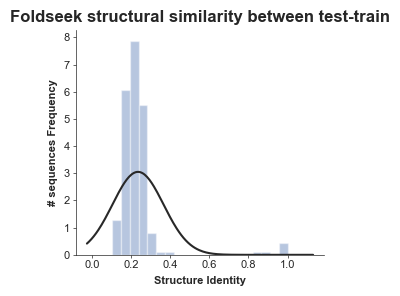

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sciviso import Histogram
# Great now lwte's check teh distribution of teh data
# Keep the top one
foldseek_df = results.sort_values(by='fident', ascending=False)
foldseek_df.drop_duplicates('pdb_query', inplace=True, keep='first')

# Plot as above the histogram of the results 
config = {'figsize': (3, 3), 'colour': 'grey'}

hist = Histogram(foldseek_df, x='fident', ylabel='# sequences', xlabel='Structure Identity',
                 title='Foldseek structural similarity between test-train', config=config)
hist.plot()
plt.savefig(os.path.join(fig_dir, 'CataloDB_FoldSeek_test-train_structuresim.svg'))

# Remove those few that are over the identity

To do this we need to map back to the uniprot ID.

In [12]:
# For each pdb we want the entry 
pdbs_to_entries = {}
for entry, p in pdbs[['Entry', 'PDB']].values:
    for pdb in p.split(';'):
        pdb = pdb.lower()
        if entry in test_ids: 
            if pdbs_to_entries.get(pdb) is not None and pdb != '':
                print(entry, pdb, pdbs_to_entries[pdb])
            else:
                pdbs_to_entries[pdb] = entry

# Map both these sets back
foldseek_df['pdb_query'] = [q.split('_')[0] for q in foldseek_df['query'].values]
foldseek_df['Entry'] = [pdbs_to_entries.get(q) for q in foldseek_df['pdb_query'].values]
foldseek_df.drop_duplicates('Entry', inplace=True)
foldseek_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,pdb_target,pdb_query,Entry
269338,5ohk_B,2y5b-assembly2.cif.gz_F,1.000,75,0,0,1,75,1,75,1.761000e-14,495,2y5b,5ohk,Q70CQ3
267433,1g4u_R,2h7v-assembly1.cif.gz_A,1.000,178,0,0,1,178,5,182,3.463000e-31,1131,2h7v,1g4u,P74873
337004,1xt9_B,3gzn-assembly2.cif.gz_J,1.000,76,0,0,1,76,4,79,1.666000e-13,481,3gzn,1xt9,Q96LD8
71857,5iy4_C,7qo1-assembly1.cif.gz_F,0.996,252,1,0,1,251,1,252,1.099000e-41,1759,7qo1,5iy4,Q9H040
180717,2dh5,7a20-assembly1.cif.gz_B,0.961,389,15,0,1,387,1,389,4.034000e-73,2797,7a20,2dh5,P0A879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350953,1dbg_A,3th0-assembly1.cif.gz_A,0.129,430,354,0,2,409,12,441,9.517000e-03,58,3th0,1dbg,Q46079
352427,2p8g,3c6k-assembly2.cif.gz_C,0.123,80,61,0,47,126,29,98,4.958000e+00,28,3c6k,2p8g,O07006
105599,1ddt,8dfm-assembly1.cif.gz_A,0.121,157,90,0,365,521,170,272,6.200000e-01,31,8dfm,1ddt,P00588
69210,1i9d,4okh-assembly1.cif.gz_A,0.118,93,64,0,12,85,41,133,2.381000e+00,26,4okh,1i9d,P08692


--------------------------------------------------------------------------------
    
 Number with >  0.4 similarity 	8	
 Number with < 0.4 similarity 	239	     
--------------------------------------------------------------------------------


/tmp/ipykernel_261381/3412011076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_structure_homology.rename(columns={'fident': 'homology'}, inplace=True)
/disk1/ariane/miniconda3/envs/protein/lib/python3.11/site-packages/sciviso/histogram.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(values, fit=norm, kde=self.plot_kde, rug=self.plot_rug, hist=self.plot_hist,


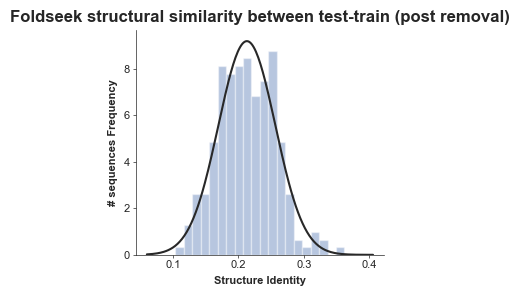

In [13]:
structural_cutoff = 0.4
u.dp([f'\n Number with >  {structural_cutoff} similarity ', len(foldseek_df[foldseek_df['fident'] > structural_cutoff]), 
      f'\n Number with < {structural_cutoff} similarity ', len(foldseek_df[foldseek_df['fident'] < structural_cutoff])])

low_structure_homology = foldseek_df[foldseek_df['fident'] < structural_cutoff]
low_structure_homology.rename(columns={'fident': 'homology'}, inplace=True)
low_structure_homology[['pdb_target', 'pdb_query', 'Entry', 'homology']].to_csv(os.path.join(data_dir, 'Low30_mmseq_ID_exp_subset_test_foldseek.csv'), index=False)
                                                                
hist = Histogram(low_structure_homology, x='homology', ylabel='# sequences', xlabel='Structure Identity',
                 title='Foldseek structural similarity between test-train (post removal)', config=config)
hist.plot()
plt.savefig(os.path.join(fig_dir, 'CataloDB_FoldSeek_test-train_structuresim_removed.svg'))

In [80]:
u.dp(['Size of test set:', len(set(low_structure_homology['Entry'].values) & set(test_seqs['Entry'].values))])
u.dp(['Size of train set:', len(set(train_seqs['Entry'].values)), '\nOverlap:', len(set(low_structure_homology['Entry'].values) & set(train_seqs['Entry'].values))])

--------------------------------------------------------------------------------
                             Size of test set:	239	                             
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                      Size of train set:	5355	
Overlap:	0	                      
--------------------------------------------------------------------------------
